In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.metrics import f1_score
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras import backend as K
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('Datasets/CV0_train_subset_step1_0.csv', index_col=0)
y_train= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_train.index]["damage_grade"] - 1
X_test = pd.read_csv('Datasets/CV0_test_subset_0.csv', index_col=0)
y_test= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_test.index]["damage_grade"] - 1
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

# MLP with few but large layers

In [3]:
spaceMLP  = [Integer(100, 500, name="n_neurons"),
             Integer(2, 5, name="n_layers")]

In [4]:
@use_named_args(spaceMLP)
def objectiveMLP(n_neurons, n_layers):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=47))
    for i in range(n_layers):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
        model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(3, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=80, batch_size=1024, validation_data=(X_test, y_test), verbose=0)
    e = max(history.history['val_accuracy'])
    epoch = history.history['val_accuracy'].index(e)
    plt.plot(range(80),history.history['accuracy'], label="train accuracy")
    plt.plot(range(80),history.history['val_accuracy'], label="validation accuracy")
    plt.legend()
    plt.show()
    print("max score test = "+ str(e) + " at epoch= " + str(epoch) + "; n_neurons = " + str(n_neurons) + "; n_layers = " + str(n_layers))
    return 1 - e

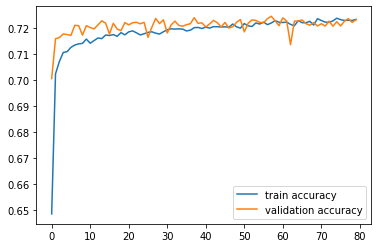

max score test = 0.7245971 at epoch= 57; n_neurons = 337; n_layers = 5


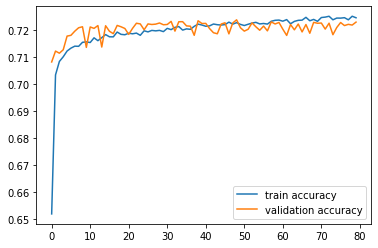

max score test = 0.7238296 at epoch= 48; n_neurons = 443; n_layers = 5


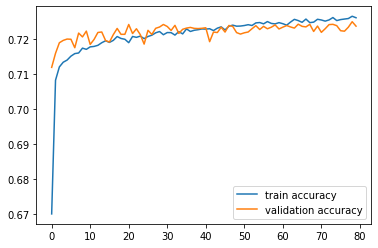

max score test = 0.72496164 at epoch= 78; n_neurons = 349; n_layers = 3


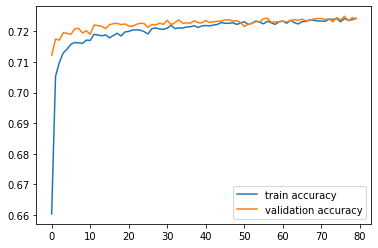

max score test = 0.72494245 at epoch= 76; n_neurons = 219; n_layers = 2


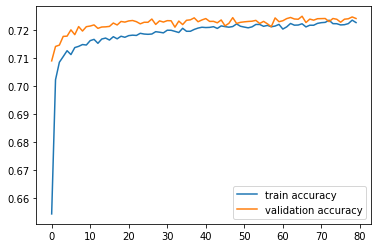

max score test = 0.72478896 at epoch= 65; n_neurons = 209; n_layers = 3


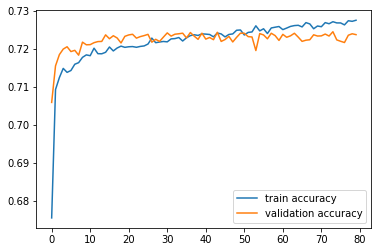

max score test = 0.7244628 at epoch= 73; n_neurons = 425; n_layers = 3


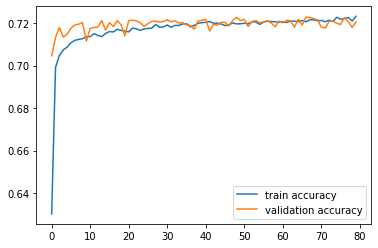

max score test = 0.7227552 at epoch= 66; n_neurons = 257; n_layers = 5


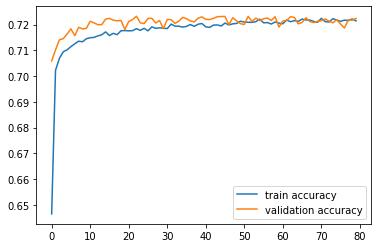

max score test = 0.723254 at epoch= 22; n_neurons = 235; n_layers = 4


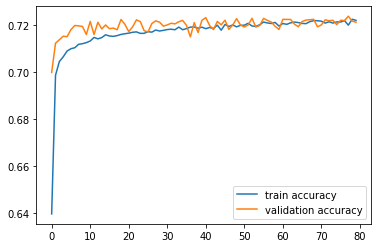

max score test = 0.72392553 at epoch= 77; n_neurons = 247; n_layers = 5


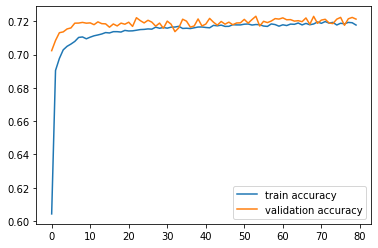

max score test = 0.7230046 at epoch= 53; n_neurons = 156; n_layers = 5


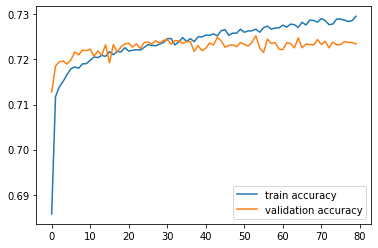

max score test = 0.7252494 at epoch= 53; n_neurons = 500; n_layers = 2


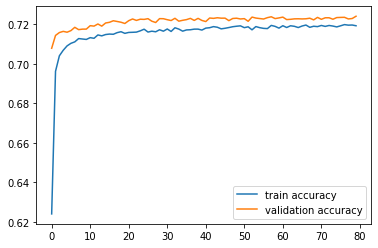

max score test = 0.7240023 at epoch= 79; n_neurons = 100; n_layers = 2


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


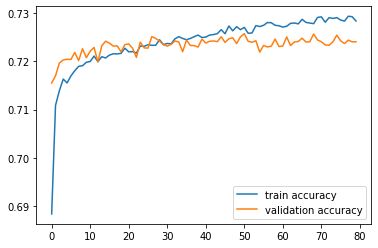

max score test = 0.7257483 at epoch= 50; n_neurons = 500; n_layers = 2


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


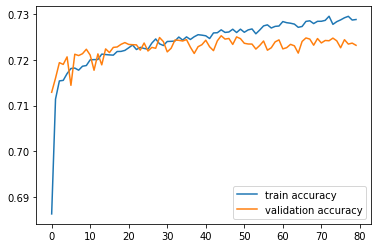

max score test = 0.7252878 at epoch= 44; n_neurons = 500; n_layers = 2


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


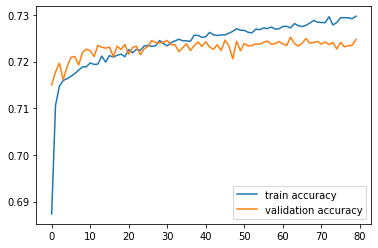

max score test = 0.7252302 at epoch= 62; n_neurons = 500; n_layers = 2


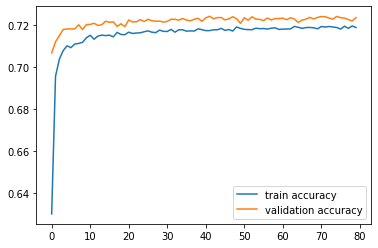

max score test = 0.72438604 at epoch= 41; n_neurons = 101; n_layers = 2


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


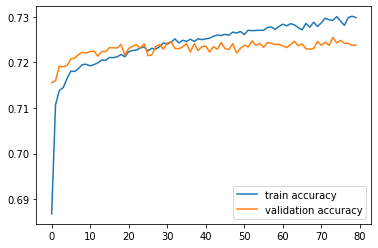

max score test = 0.72546047 at epoch= 73; n_neurons = 500; n_layers = 2


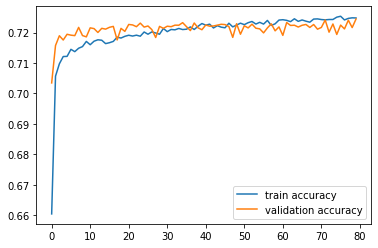

max score test = 0.7244244 at epoch= 79; n_neurons = 500; n_layers = 5


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


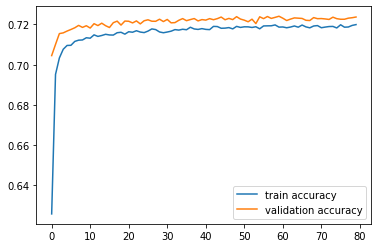

max score test = 0.7240982 at epoch= 59; n_neurons = 100; n_layers = 2


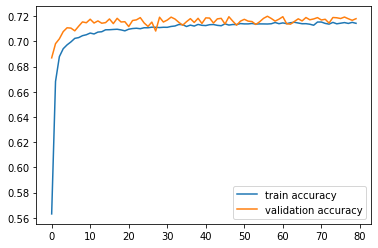

max score test = 0.719858 at epoch= 56; n_neurons = 100; n_layers = 5


(0.7257483005523682, 500, 2)

In [5]:
res_MLP = gp_minimize(objectiveMLP, spaceMLP, n_calls=20, random_state=0)
1-res_MLP.fun, res_MLP.x[0], res_MLP.x[1]

Those kind of MLP are prone to overfitting very quick. Their results with early stopping are interesting.

In [16]:
spaceMLP  = [Integer(450, 700, name="n_neurons")]

In [17]:
@use_named_args(spaceMLP)
def objectiveMLP(n_neurons):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=47))
    for i in range(2):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
        model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(3, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=35, batch_size=1024, validation_data=(X_test, y_test), verbose=0)
    e = max(history.history['val_accuracy'])
    epoch = history.history['val_accuracy'].index(e)
    plt.plot(range(35),history.history['accuracy'], label="train accuracy")
    plt.plot(range(35),history.history['val_accuracy'], label="validation accuracy")
    plt.legend()
    plt.show()
    print("max score test = "+ str(e) + " at epoch= " + str(epoch) + "; n_neurons = " + str(n_neurons))
    return 1 - e

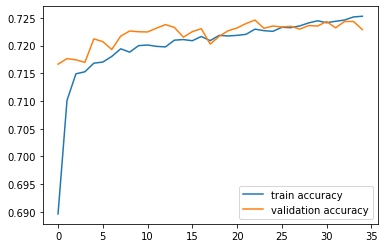

max score test = 0.7246163 at epoch= 22; n_neurons = 598


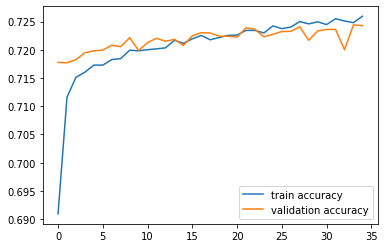

max score test = 0.7244052 at epoch= 33; n_neurons = 661


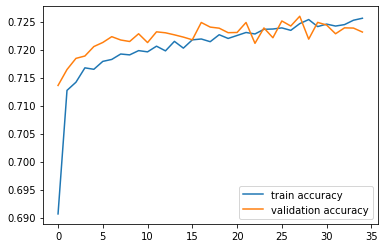

max score test = 0.72594017 at epoch= 27; n_neurons = 664


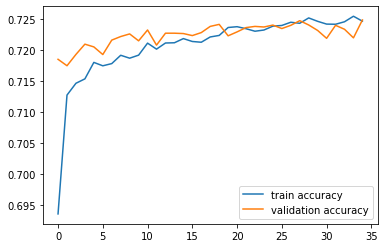

max score test = 0.72480816 at epoch= 34; n_neurons = 662


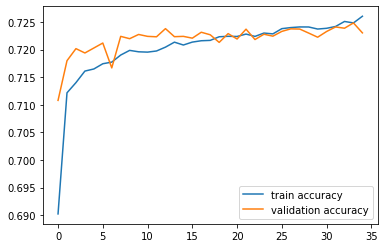

max score test = 0.7248465 at epoch= 33; n_neurons = 606


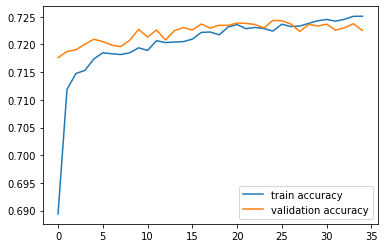

max score test = 0.72434765 at epoch= 24; n_neurons = 546


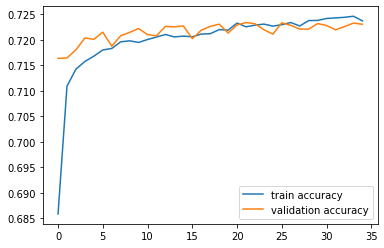

max score test = 0.7234267 at epoch= 21; n_neurons = 524


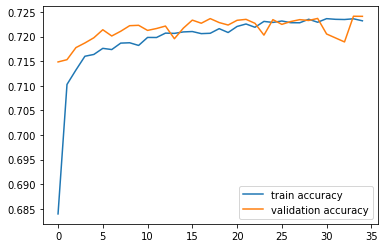

max score test = 0.7241366 at epoch= 33; n_neurons = 464


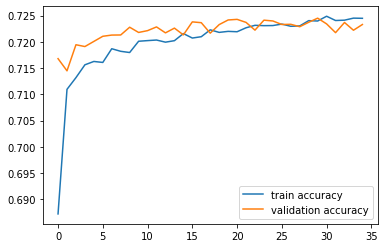

max score test = 0.72450113 at epoch= 29; n_neurons = 518


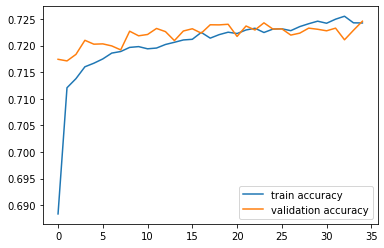

max score test = 0.7245779 at epoch= 34; n_neurons = 569


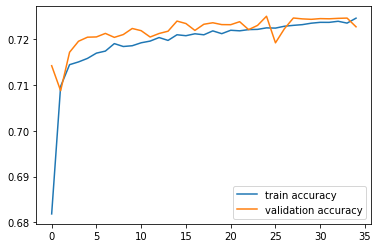

max score test = 0.72494245 at epoch= 24; n_neurons = 450


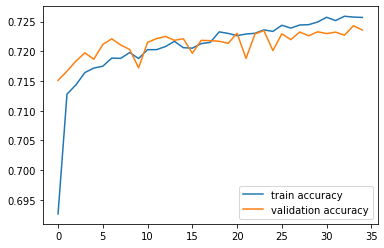

max score test = 0.7242901 at epoch= 33; n_neurons = 700


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


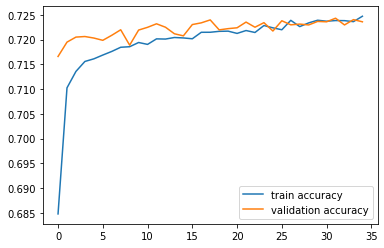

max score test = 0.72430927 at epoch= 31; n_neurons = 450


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


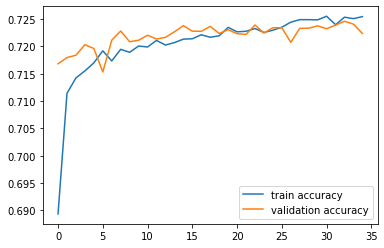

max score test = 0.7246163 at epoch= 32; n_neurons = 700


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


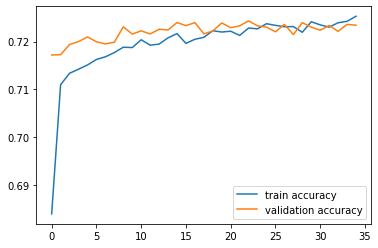

max score test = 0.72430927 at epoch= 22; n_neurons = 450


(0.7259401679039001, 664)

In [18]:
res_MLP = gp_minimize(objectiveMLP, spaceMLP, n_calls=10, random_state=0)
1-res_MLP.fun, res_MLP.x[0]

# MLP with more small layers 

In [8]:
spaceMLP  = [Integer(2, 20, name="n_neurons"),
             Integer(5, 25, name="n_layers")]

In [9]:
@use_named_args(spaceMLP)
def objectiveMLP(n_neurons, n_layers):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=47))
    for i in range(n_layers):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
    model.add(keras.layers.Dense(3, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_data=(X_test, y_test), verbose=0)
    e = max(history.history['val_accuracy'])
    epoch = history.history['val_accuracy'].index(e)
    plt.plot(range(100),history.history['accuracy'], label="train accuracy")
    plt.plot(range(100),history.history['val_accuracy'], label="validation accuracy")
    plt.legend()
    plt.show()
    print("max score test = "+ str(e) + " at epoch= " + str(epoch) + "; n_neurons = " + str(n_neurons) + "; n_layers = " + str(n_layers))
    return 1 - e

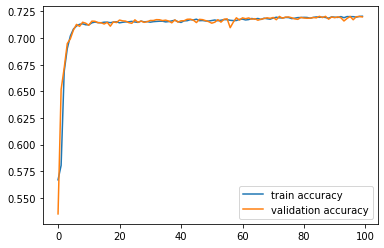

max score test = 0.7204336 at epoch= 85; n_neurons = 13; n_layers = 22


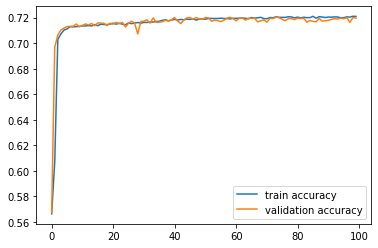

max score test = 0.7203569 at epoch= 73; n_neurons = 17; n_layers = 22


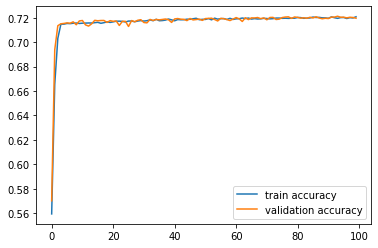

max score test = 0.72125864 at epoch= 93; n_neurons = 13; n_layers = 13


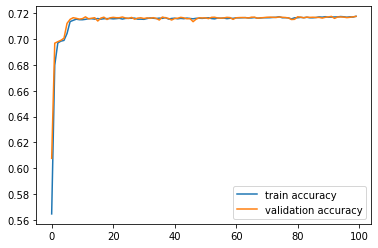

max score test = 0.7173638 at epoch= 91; n_neurons = 7; n_layers = 6


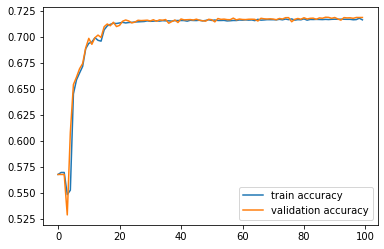

max score test = 0.71855336 at epoch= 87; n_neurons = 7; n_layers = 15


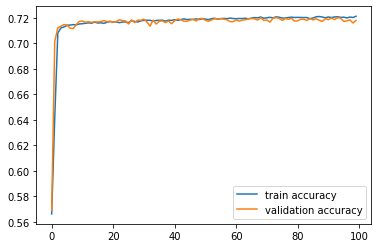

max score test = 0.72008824 at epoch= 73; n_neurons = 17; n_layers = 15


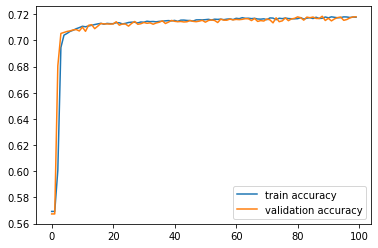

max score test = 0.718419 at epoch= 88; n_neurons = 9; n_layers = 22


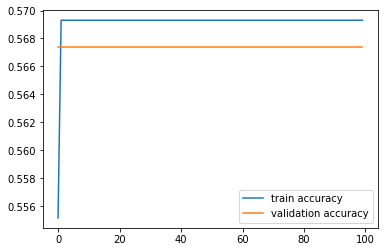

max score test = 0.567383 at epoch= 0; n_neurons = 8; n_layers = 18


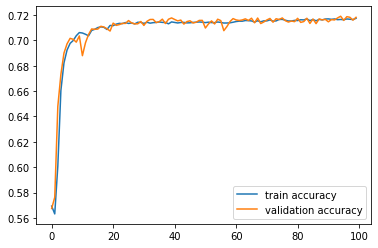

max score test = 0.71895623 at epoch= 94; n_neurons = 9; n_layers = 24


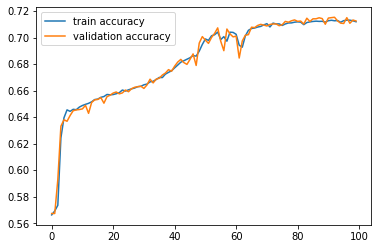

max score test = 0.7152724 at epoch= 92; n_neurons = 5; n_layers = 22


(0.7212586402893066, 13, 13)

In [10]:
res_MLP = gp_minimize(objectiveMLP, spaceMLP, n_calls=10, random_state=0)
1-res_MLP.fun, res_MLP.x[0], res_MLP.x[1]

# Generalization & Predictions

I will make predictions with the 2x600 neurons network and with the 13x13 neurons network, hoping that their specificity will be different.

In [22]:
generalization = pd.Series(index=range(4))
for i in generalization.index:
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=47))
    for k in range(2):
        model.add(keras.layers.Dense(660,activation="relu"))
    model.add(keras.layers.Dense(3, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    X_train = pd.read_csv('Datasets/CV0_train_subset_step1_{}.csv'.format(i), index_col=0)
    y_train= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_train.index]["damage_grade"]-1
    X_test = pd.read_csv('Datasets/CV0_test_subset_{}.csv'.format(i), index_col=0)
    y_test= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_test.index]["damage_grade"]-1
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test2 = np.asarray(X_test)
    model.fit(X_train, y_train, epochs=30, batch_size=1024, verbose=0)
    predict = pd.DataFrame(model.predict_classes(X_test2), columns=['MLP1']).set_index(X_test.index)
    predict.to_csv("Datasets/MLP1_predicted_step1_subset_{}.csv".format(i))
    generalization[i] = f1_score(y_test, predict, average='micro')
generalization

0    0.719129
1    0.715407
2    0.717863
3    0.720530
dtype: float64

In [25]:
for i in range(5):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=47))
    for k in range(2):
        model.add(keras.layers.Dense(660,activation="relu"))
    model.add(keras.layers.Dense(3, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    X_train = pd.read_csv('Datasets/CV0_train_subset_step2_{}.csv'.format(i), index_col=0)
    y_train= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_train.index]["damage_grade"]-1
    X_test = pd.read_csv('Datasets/CV0_test_subset_{}.csv'.format(i), index_col=0)
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test2 = np.asarray(X_test)
    model.fit(X_train, y_train, epochs=30, batch_size=1024, verbose=0)
    predict = pd.DataFrame(model.predict_classes(X_test2), columns=['MLP1']).set_index(X_test.index)
    predict.to_csv("Datasets/MLP1_predicted_step2_subset_{}.csv".format(i))

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=47))
for k in range(2):
    model.add(keras.layers.Dense(660,activation="relu"))
model.add(keras.layers.Dense(3, activation='softmax'))
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
X_train = pd.read_csv('Datasets/train_full_processed.csv', index_col=0)
y_train= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_train.index]["damage_grade"]-1
X_val = pd.read_csv('Datasets/submission_processed.csv', index_col=0)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val2 = np.asarray(X_val)
model.fit(X_train, y_train, epochs=30, batch_size=1024, verbose=0)
predict = pd.DataFrame(model.predict_classes(X_val2), columns=['MLP1']).set_index(X_val.index)
predict.to_csv("Datasets/MLP1_predicted_submission.csv")

In [28]:
generalization = pd.Series(index=range(4))
for i in generalization.index:
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=47))
    for k in range(13):
        model.add(keras.layers.Dense(13,activation="relu"))
    model.add(keras.layers.Dense(3, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    X_train = pd.read_csv('Datasets/CV0_train_subset_step1_{}.csv'.format(i), index_col=0)
    y_train= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_train.index]["damage_grade"]-1
    X_test = pd.read_csv('Datasets/CV0_test_subset_{}.csv'.format(i), index_col=0)
    y_test= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_test.index]["damage_grade"]-1
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test2 = np.asarray(X_test)
    model.fit(X_train, y_train, epochs=100, batch_size=1024, verbose=0)
    predict = pd.DataFrame(model.predict_classes(X_test2), columns=['MLP2']).set_index(X_test.index)
    predict.to_csv("Datasets/MLP2_predicted_step1_subset_{}.csv".format(i))
    generalization[i] = f1_score(y_test, predict, average='micro')
generalization

0    0.716731
1    0.716865
2    0.718227
3    0.717748
dtype: float64

In [29]:
for i in range(5):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=47))
    for k in range(13):
        model.add(keras.layers.Dense(13,activation="relu"))
    model.add(keras.layers.Dense(3, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    X_train = pd.read_csv('Datasets/CV0_train_subset_step2_{}.csv'.format(i), index_col=0)
    y_train= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_train.index]["damage_grade"]-1
    X_test = pd.read_csv('Datasets/CV0_test_subset_{}.csv'.format(i), index_col=0)
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test2 = np.asarray(X_test)
    model.fit(X_train, y_train, epochs=100, batch_size=1024, verbose=0)
    predict = pd.DataFrame(model.predict_classes(X_test2), columns=['MLP2']).set_index(X_test.index)
    predict.to_csv("Datasets/MLP2_predicted_step2_subset_{}.csv".format(i))

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=47))
for k in range(13):
    model.add(keras.layers.Dense(13,activation="relu"))
model.add(keras.layers.Dense(3, activation='softmax'))
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
X_train = pd.read_csv('Datasets/train_full_processed.csv', index_col=0)
y_train= pd.read_csv('Datasets/train_labels.csv', index_col=0).loc[X_train.index]["damage_grade"]-1
X_val = pd.read_csv('Datasets/submission_processed.csv', index_col=0)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val2 = np.asarray(X_val)
model.fit(X_train, y_train, epochs=100, batch_size=1024, verbose=0)
predict = pd.DataFrame(model.predict_classes(X_val2), columns=['MLP2']).set_index(X_val.index)
predict.to_csv("Datasets/MLP2_predicted_submission.csv")